In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport
from matplotlib import pyplot

In [2]:
df_lend=pd.read_csv('loan.csv')

C:\Users\PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
null_col=df_lend.isnull().sum()

In [4]:
null_df=pd.DataFrame(null_col,columns=['null_values'])

In [5]:
null_df.reset_index(inplace=True)
null_df.columns=['col_name','null_values']
null_df

,col_name,null_values
0,id,0
1,member_id,0
2,loan_amnt,0
3,funded_amnt,0
4,funded_amnt_inv,0
...,...,...
106,tax_liens,39
107,tot_hi_cred_lim,39717
108,total_bal_ex_mort,39717
109,total_bc_limit,39717


In [6]:
count_of_df=len(df_lend)

In [7]:
count_of_df

39717

In [8]:
null_df['percentage_of_null_values']=(null_df['null_values']/count_of_df)*100


In [9]:
null_df

,col_name,null_values,percentage_of_null_values
0,id,0,0.000000
1,member_id,0,0.000000
2,loan_amnt,0,0.000000
3,funded_amnt,0,0.000000
4,funded_amnt_inv,0,0.000000
...,...,...,...
106,tax_liens,39,0.098195
107,tot_hi_cred_lim,39717,100.000000
108,total_bal_ex_mort,39717,100.000000
109,total_bc_limit,39717,100.000000


<AxesSubplot:>

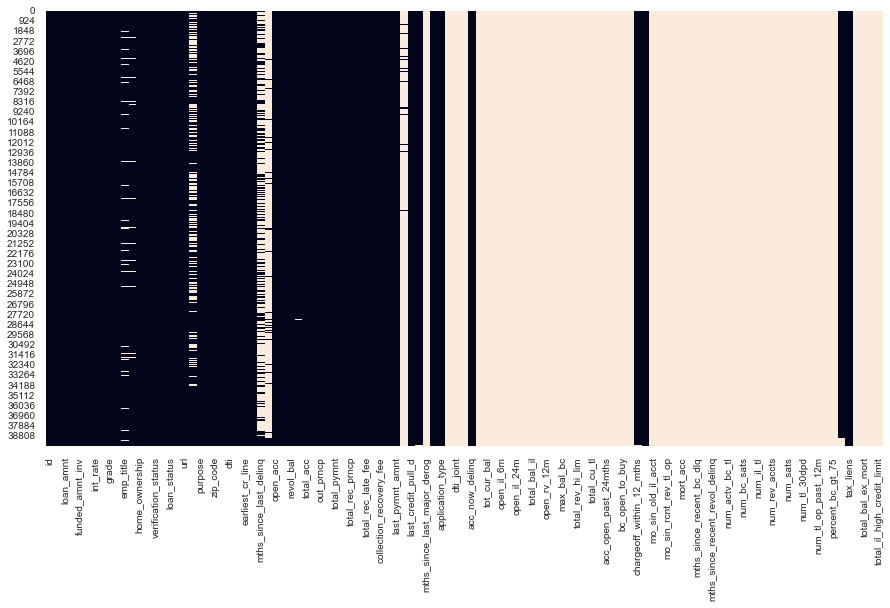

In [154]:
pyplot.subplots(figsize=(15,8))
sns.heatmap(df_lend.isnull(),cbar=False)

In [10]:
col_80_null=null_df[null_df['percentage_of_null_values']>=20]

In [11]:
col_gt_80_null=col_80_null['col_name'].to_list()

In [12]:
all_col=df_lend.columns

In [13]:
remaining_col=list(set(all_col)-set(col_gt_80_null))

In [14]:
df_lend_no_current=df_lend[df_lend['loan_status']!='Current']

In [15]:
ana_data_lend=df_lend_no_current[remaining_col]

In [16]:
ana_data_lend.to_csv('all_data.csv')

In [17]:
ana_data_lend.describe()

,out_prncp_inv,total_rec_int,pub_rec_bankruptcies,total_pymnt,open_acc,collection_recovery_fee,loan_amnt,funded_amnt,last_pymnt_amnt,inq_last_6mths,...,total_rec_prncp,annual_inc,tax_liens,chargeoff_within_12_mths,dti,total_acc,funded_amnt_inv,total_rec_late_fee,revol_bal,out_prncp
count,38577.0,38577.000000,37880.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,...,38577.000000,3.857700e+04,38538.0,38521.0,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.0
mean,0.0,2119.243370,0.043479,11866.970365,9.275423,12.772728,11047.025430,10784.058506,2746.243218,0.871737,...,9648.322898,6.877797e+04,0.0,0.0,13.272727,22.052648,10222.481123,1.368634,13289.489826,0.0
std,0.0,2389.499511,0.204583,8809.856227,4.401588,150.836853,7348.441646,7090.306027,4494.648131,1.071546,...,7009.381200,6.421868e+04,0.0,0.0,6.673044,11.425861,7022.720644,7.315880,15866.492241,0.0
min,0.0,0.000000,0.000000,0.000000,2.000000,0.000000,500.000000,500.000000,0.000000,0.000000,...,0.000000,4.000000e+03,0.0,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,643.990000,0.000000,5513.497338,6.000000,0.000000,5300.000000,5200.000000,217.420000,0.000000,...,4500.000000,4.000000e+04,0.0,0.0,8.130000,13.000000,5000.000000,0.000000,3650.000000,0.0
50%,0.0,1300.450000,0.000000,9674.048405,9.000000,0.000000,9600.000000,9550.000000,568.260000,1.000000,...,8000.000000,5.886800e+04,0.0,0.0,13.370000,20.000000,8733.440000,0.000000,8762.000000,0.0
75%,0.0,2671.980000,0.000000,16136.952430,12.000000,0.000000,15000.000000,15000.000000,3447.250000,1.000000,...,13175.000000,8.200000e+04,0.0,0.0,18.560000,29.000000,14000.000000,0.000000,16912.000000,0.0
max,0.0,23563.680000,2.000000,58563.679930,44.000000,7002.190000,35000.000000,35000.000000,36115.200000,8.000000,...,35000.020000,6.000000e+06,0.0,0.0,29.990000,90.000000,35000.000000,180.200000,149588.000000,0.0


<AxesSubplot:>

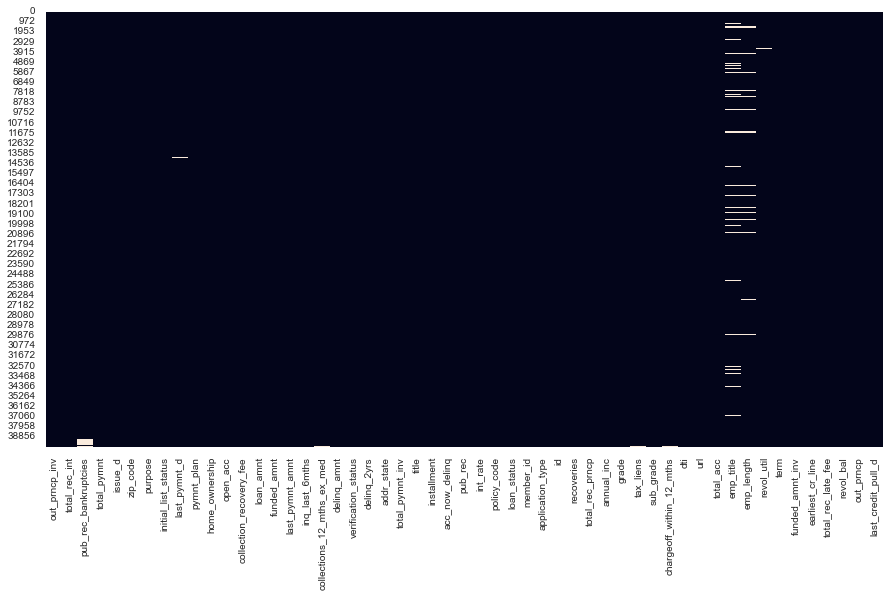

In [18]:
pyplot.subplots(figsize=(15,8))
sns.heatmap(ana_data_lend.isnull(),cbar=False)

In [19]:
ana_data_lend.isin([0]).sum(axis=1).sort_values()

39666     7
27846     7
39667     7
18948     7
14558     7
         ..
3985     18
36937    18
16301    18
14220    19
36206    19
Length: 38577, dtype: int64

In [20]:
len(ana_data_lend.columns)

53

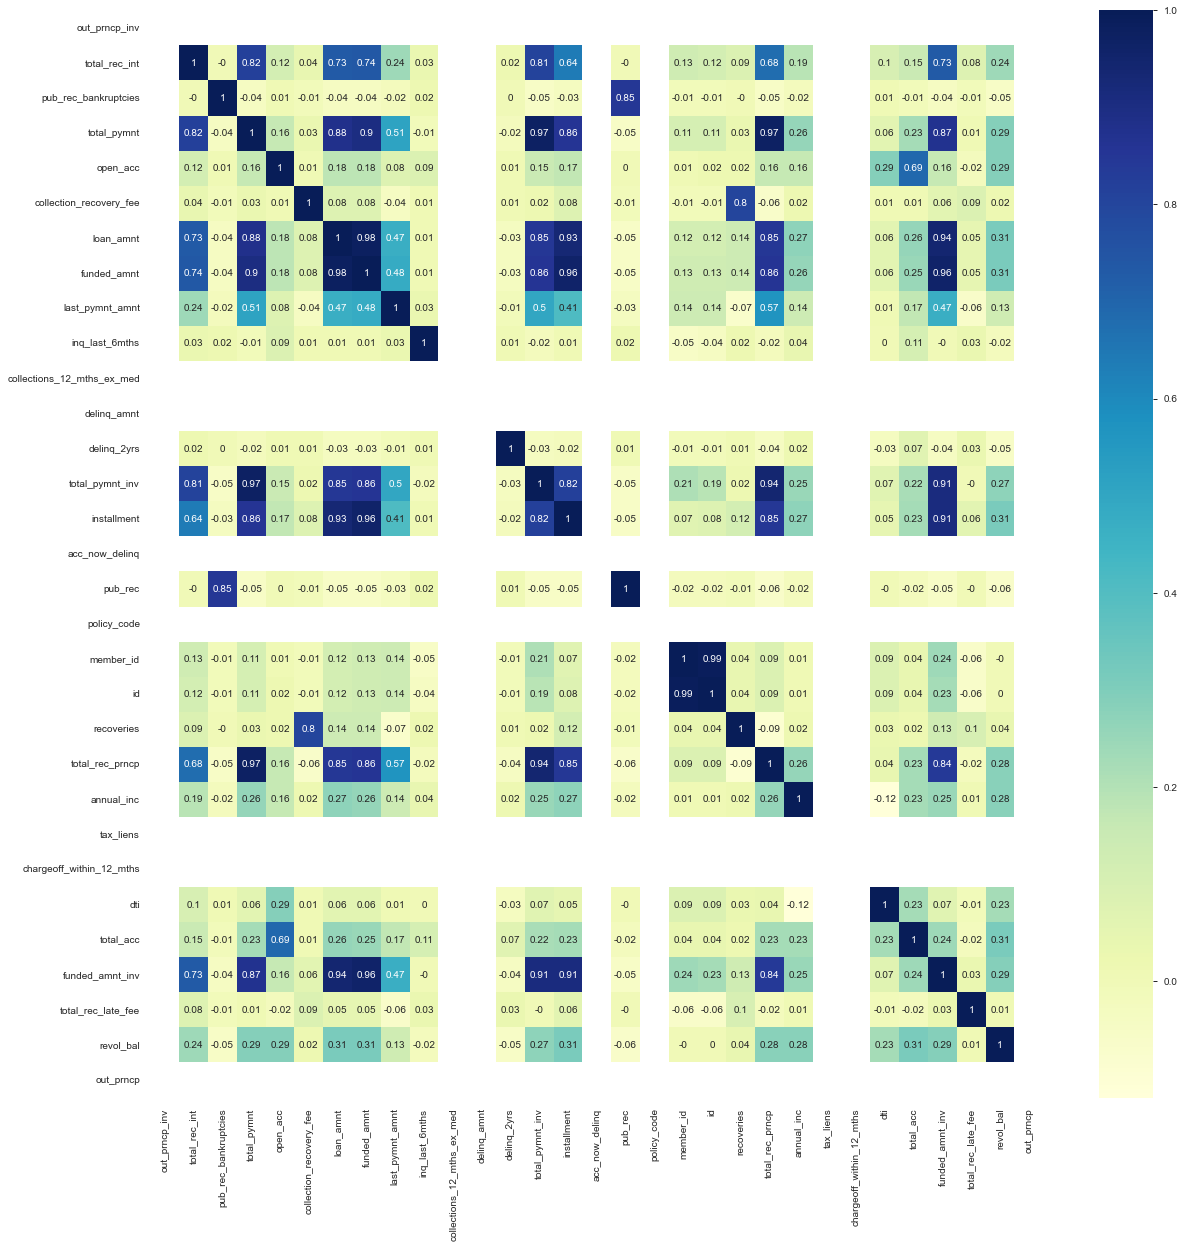

In [21]:
pyplot.subplots(figsize=(20,20))
sns.heatmap(ana_data_lend.corr().round(2),annot=True,cmap="YlGnBu")
pyplot.savefig('corr.png')

<AxesSubplot:xlabel='funded_amnt_inv', ylabel='total_rec_int'>

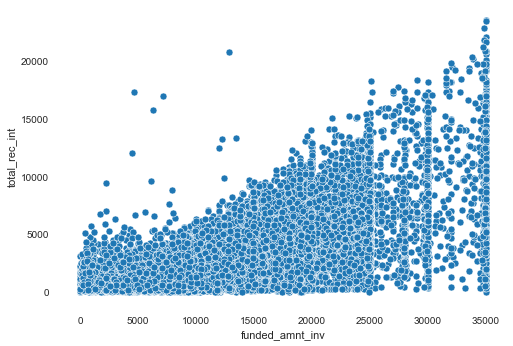

In [22]:
sns.scatterplot(y=ana_data_lend['total_rec_int'],x=ana_data_lend['funded_amnt_inv'])

In [23]:
ana_data_lend.groupby(['title','loan_status'])['title'].count().to_csv('title_loan.csv')

In [24]:
ana_data_lend['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='purpose', ylabel='funded_amnt'>

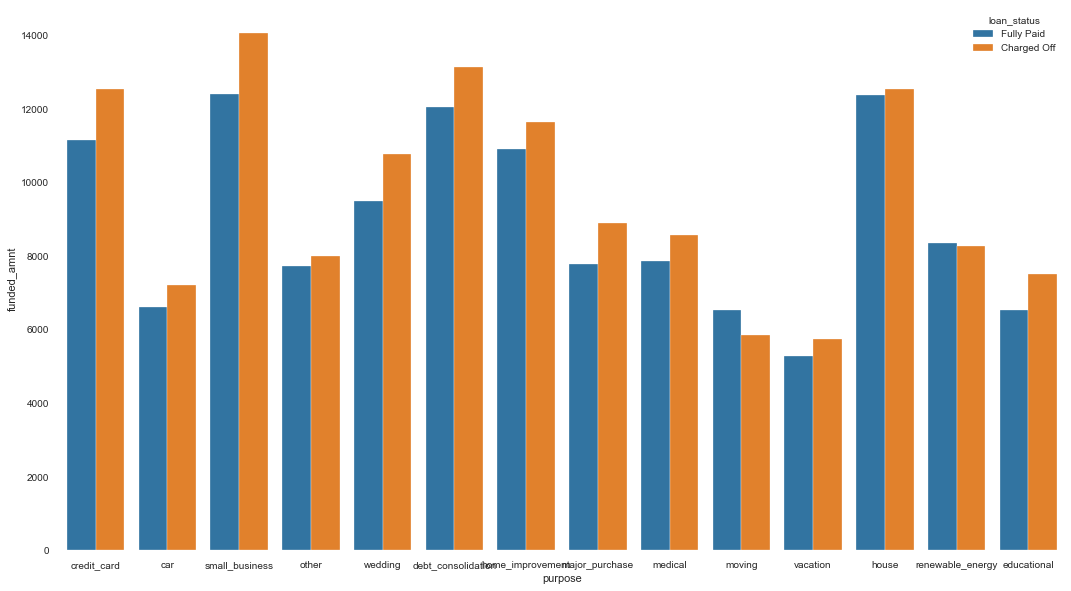

In [152]:
pyplot.subplots(figsize=(18,10))
grp_order=ana_data_lend[ana_data_lend['loan_status']=="Charged Off"].groupby(['purpose']).funded_amnt.sum().sort_values().index
sns.barplot(x=ana_data_lend['purpose'],y=ana_data_lend['funded_amnt'],hue=ana_data_lend['loan_status'],estimator=np.mean,ci=0)

<AxesSubplot:xlabel='purpose', ylabel='percent'>

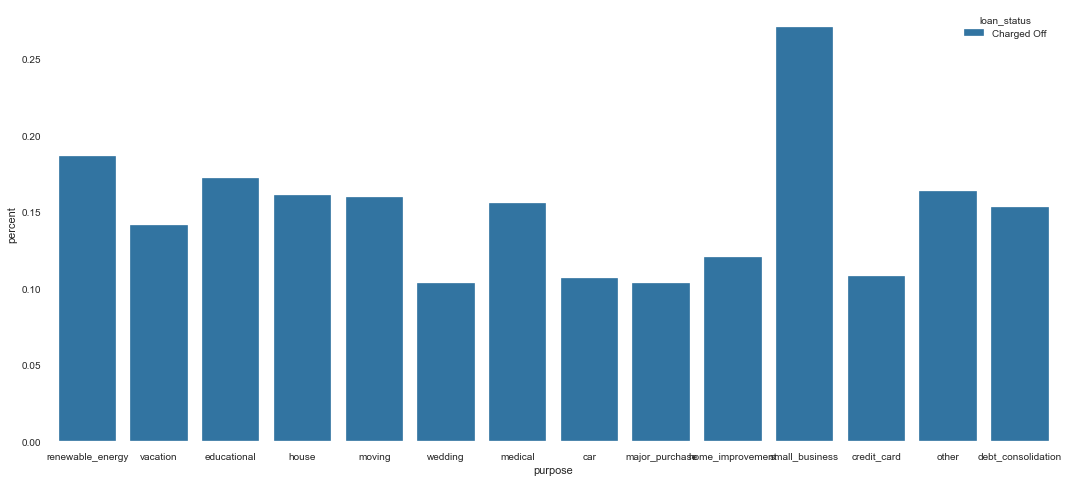

In [153]:
purpose=pd.DataFrame(ana_data_lend.groupby(['purpose','loan_status'])['member_id'].count())
purpose=purpose.reset_index()
purpose['total']=purpose['purpose'].map(ana_data_lend.groupby(['purpose'])['member_id'].count().to_dict())
purpose['percent']=purpose['member_id']/purpose['total']
pyplot.subplots(figsize=(18,8))
grp_order=purpose[purpose['loan_status']=='Charged Off'].groupby(['purpose']).member_id.sum().sort_values().index
sns.barplot(data=purpose[purpose['loan_status']=='Charged Off'],x='purpose',y='percent',hue='loan_status',order=grp_order)

<AxesSubplot:xlabel='purpose', ylabel='count'>

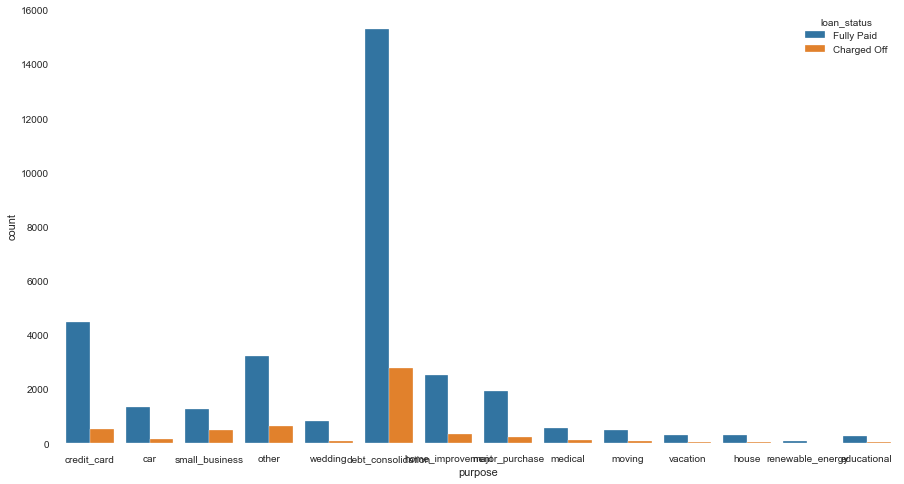

In [26]:
pyplot.subplots(figsize=(15,8))
sns.countplot(data=ana_data_lend,x='purpose',hue='loan_status')

<AxesSubplot:xlabel='term', ylabel='count'>

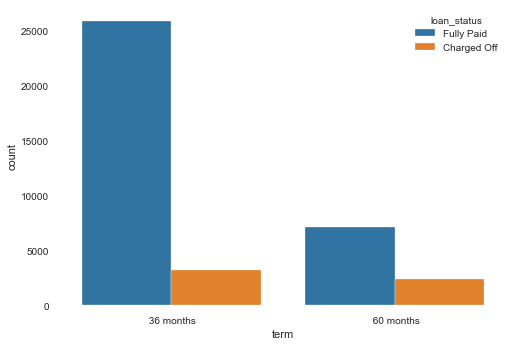

In [27]:
sns.countplot(data=ana_data_lend,x='term',hue='loan_status')

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

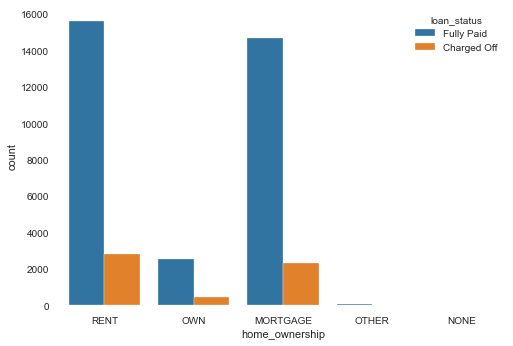

In [28]:
sns.countplot(data=ana_data_lend,x='home_ownership',hue='loan_status')

In [29]:
# pyplot.subplots(figsize=(18,18))
# sns.pairplot(ana_data_lend,hue='loan_status',x_vars=)

<AxesSubplot:xlabel='home_ownership', ylabel='total_pymnt_inv'>

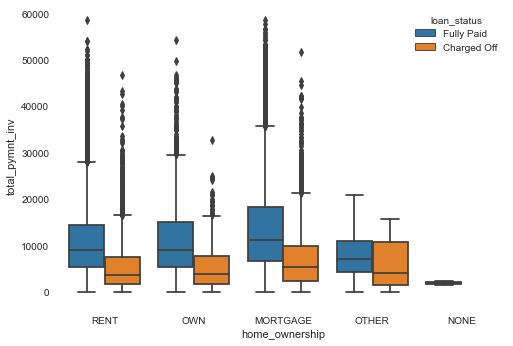

In [30]:
sns.boxplot(x=ana_data_lend['home_ownership'],y=ana_data_lend['total_pymnt_inv'],hue=ana_data_lend['loan_status'])

<AxesSubplot:xlabel='home_ownership', ylabel='int_rate'>

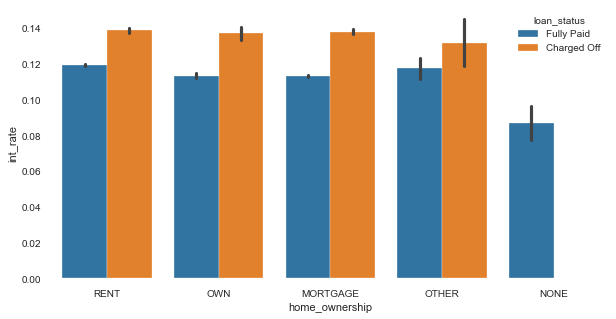

In [31]:
pyplot.subplots(figsize=(10,5))
sns.barplot(x=ana_data_lend['home_ownership'],y=(ana_data_lend['int_rate'].str[:-1].astype('float')/100.0),hue=ana_data_lend['loan_status'])

<AxesSubplot:xlabel='application_type', ylabel='int_rate'>

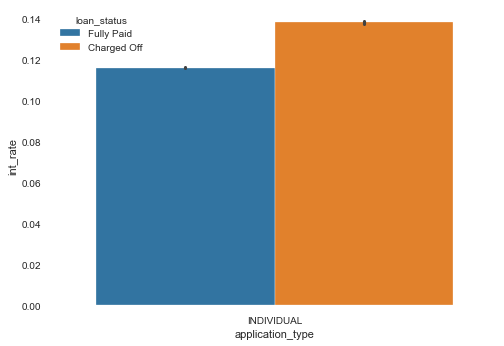

In [32]:
sns.barplot(x=ana_data_lend['application_type'],y=(ana_data_lend['int_rate'].str[:-1].astype('float')/100.0),hue=ana_data_lend['loan_status'])

<AxesSubplot:xlabel='verification_status', ylabel='int_rate'>

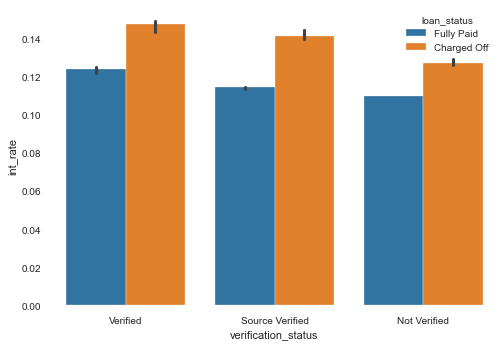

In [33]:


sns.barplot(x=ana_data_lend['verification_status'],
                y=(ana_data_lend['int_rate'].str[:-1].astype('float')/100.0),hue=ana_data_lend['loan_status'],estimator=np.median)

<AxesSubplot:xlabel='grade', ylabel='funded_amnt'>

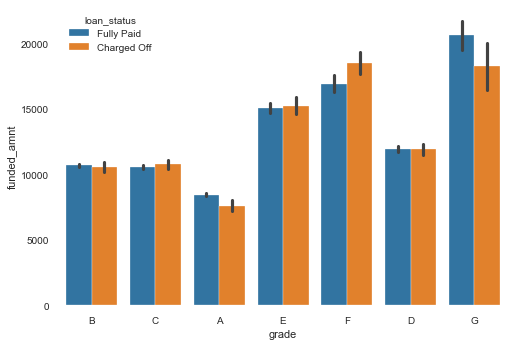

In [34]:
sns.barplot(x=ana_data_lend['grade'],y=ana_data_lend['funded_amnt'],hue=ana_data_lend['loan_status'])

<AxesSubplot:xlabel='grade', ylabel='count'>

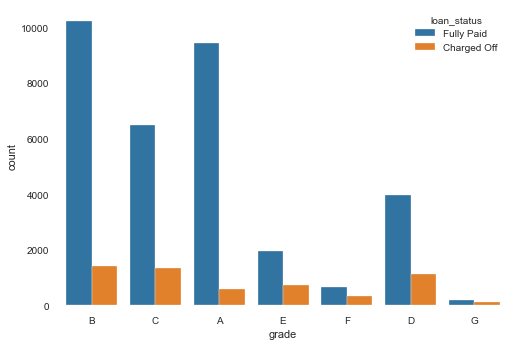

In [35]:
sns.countplot(x=ana_data_lend['grade'],hue=ana_data_lend['loan_status'])

<AxesSubplot:xlabel='emp_length', ylabel='count'>

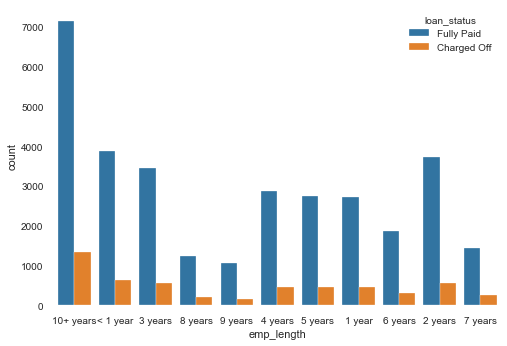

In [36]:
sns.countplot(data=ana_data_lend,x='emp_length',hue='loan_status')

<AxesSubplot:xlabel='emp_length', ylabel='loan_amnt'>

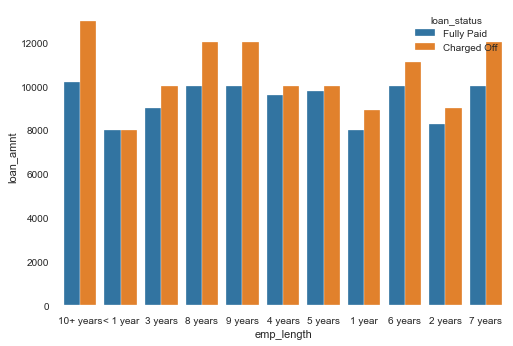

In [37]:
sns.barplot(data=ana_data_lend,x='emp_length',y='loan_amnt',hue='loan_status',ci=0,estimator=np.median)

In [38]:
k=pd.DataFrame(ana_data_lend.groupby(['term','loan_status'])['member_id'].count())

In [39]:
k.reset_index(inplace=True)

In [40]:
k.rename(columns={'member_id':'count'},inplace=True)

In [41]:
k['cum_sum']=k.groupby('term')['count'].cumsum()

In [42]:
ser=ana_data_lend.groupby(['term'])['member_id'].count()

In [43]:
ser_dict=ser.to_dict()

In [44]:
ser_dict

{' 36 months': 29096, ' 60 months': 9481}

In [45]:
k['sum_by_term']=k['term'].map(ser_dict)

In [46]:
k['percent']=k['count']/k['sum_by_term']

<AxesSubplot:xlabel='term', ylabel='percent'>

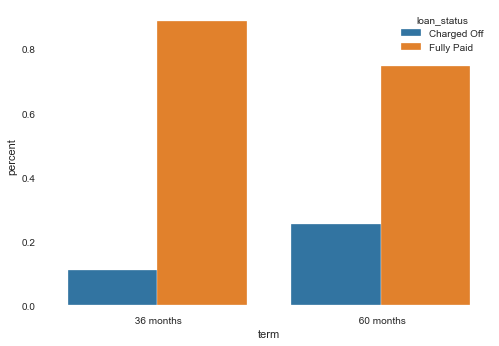

In [47]:

sns.barplot(data=k,x='term',y='percent',hue='loan_status')

In [48]:
len(ana_data_lend['emp_title'].unique())
#droping emp_totle columns as so many rows have nan value and has 28K unique values so will not give any usefull insights
ana_data_lend=ana_data_lend.drop(['emp_title'],axis=1)

<AxesSubplot:>

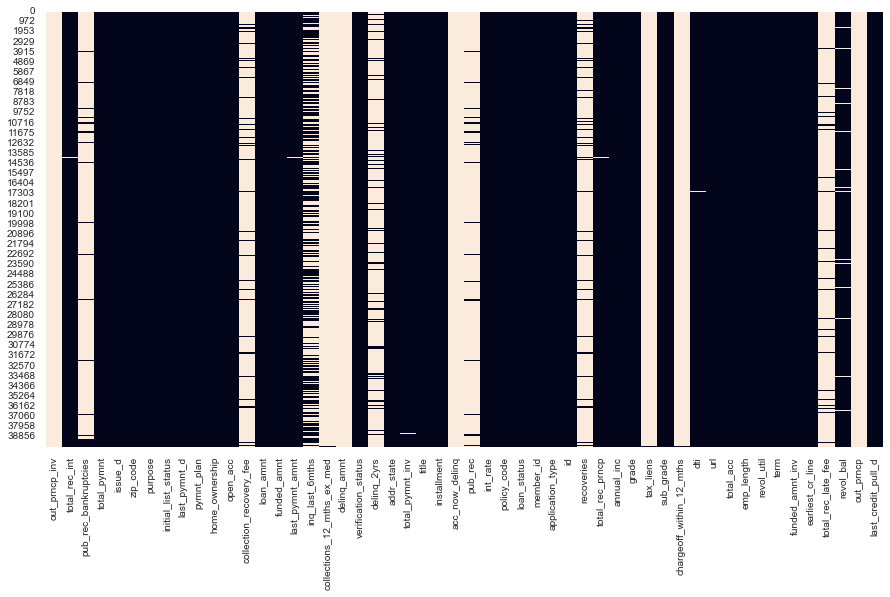

In [49]:
pyplot.subplots(figsize=(15,8))
sns.heatmap(ana_data_lend==0,cbar=False)

<AxesSubplot:>

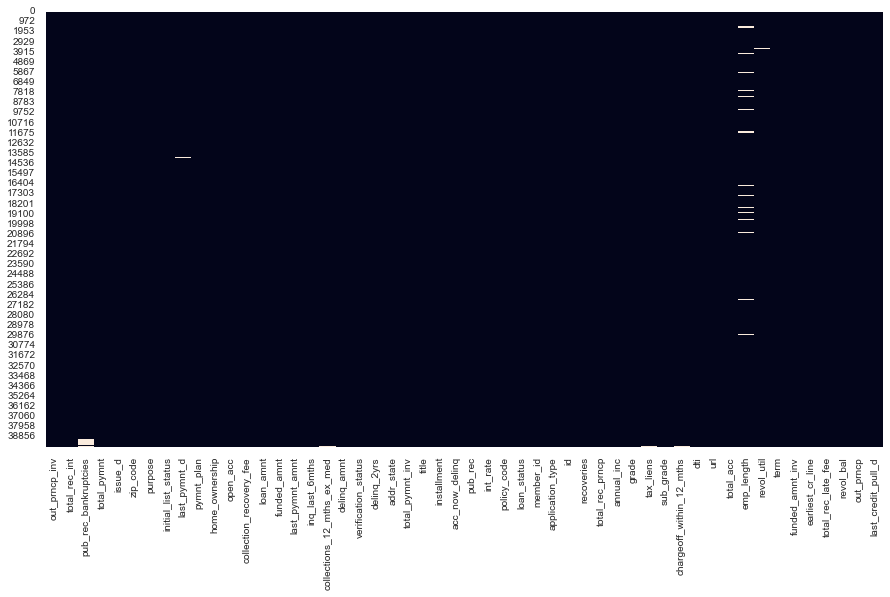

In [50]:
pyplot.subplots(figsize=(15,8))
sns.heatmap(ana_data_lend.isnull(),cbar=False)

In [51]:
null_data=pd.DataFrame(ana_data_lend.isnull().sum())

null_data=null_data.reset_index()

null_data=null_data.rename(columns={'index':'col_name',0:'null_vaues'})

In [52]:
zero_data=pd.DataFrame((ana_data_lend==0).sum())

zero_data=zero_data.reset_index()

zero_data=zero_data.rename(columns={'index':'col_name',0:'number_of_zero'})

In [53]:
zero_data

,col_name,number_of_zero
0,out_prncp_inv,38577
1,total_rec_int,71
2,pub_rec_bankruptcies,36238
3,total_pymnt,16
4,issue_d,0
5,zip_code,0
6,purpose,0
7,initial_list_status,0
8,last_pymnt_d,0
9,pymnt_plan,0


In [54]:
zero_null_merge=zero_data.merge(null_data,on='col_name',how='left')

In [55]:
zero_null_merge

,col_name,number_of_zero,null_vaues
0,out_prncp_inv,38577,0
1,total_rec_int,71,0
2,pub_rec_bankruptcies,36238,697
3,total_pymnt,16,0
4,issue_d,0,0
5,zip_code,0,0
6,purpose,0,0
7,initial_list_status,0,0
8,last_pymnt_d,0,71
9,pymnt_plan,0,0


In [66]:
def find_digit(x):
#     print(x)
    abc=re.findall(r'\d+',str(x))
#     print(abc)
    if x == "nan":
        return 0
    else:
        return int(abc[0])
    

In [64]:
ana_data_lend['emp_length'].fillna(0,inplace=True)

In [67]:
import re
ana_data_lend['emp_length_num']=ana_data_lend['emp_length'].apply(lambda x :find_digit(x))

In [68]:
ana_data_lend.loc[ana_data_lend['funded_amnt']!=ana_data_lend['loan_amnt'],['funded_amnt','funded_amnt_inv','loan_amnt','total_pymnt','total_rec_prncp']]

,funded_amnt,funded_amnt_inv,loan_amnt,total_pymnt,total_rec_prncp
61,8950,8925.000000,17500,13227.100010,8950.00
66,8925,8925.000000,12500,5577.750000,2812.82
70,13575,13550.000000,20975,18112.460870,13575.00
77,7200,7175.000000,7250,8204.774089,7200.00
80,22075,22050.000000,35000,28887.100070,22075.00
...,...,...,...,...,...
39533,6000,700.000000,10000,6778.258742,6000.00
39593,4800,1949.999594,20000,1605.300000,1028.79
39600,1000,550.000000,4000,868.810000,719.90
39601,5000,1399.996684,12000,4820.710000,3891.56


<AxesSubplot:xlabel='funded_amnt', ylabel='int_rate'>

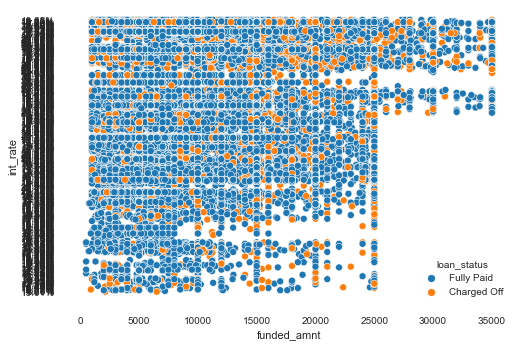

In [69]:
sns.scatterplot(data=ana_data_lend,x='funded_amnt',y='int_rate',hue='loan_status') 

<AxesSubplot:xlabel='funded_amnt', ylabel='last_credit_pull_d'>

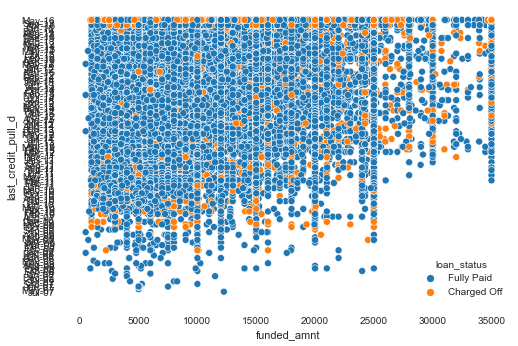

In [70]:
sns.scatterplot(data=ana_data_lend,x='funded_amnt',y='last_credit_pull_d',hue='loan_status') 

In [71]:
ana_data_lend.issue_d.dtype

dtype('O')

In [72]:
ana_data_lend['month']=ana_data_lend['issue_d'].apply(lambda x:x.split("-")[0])

<AxesSubplot:xlabel='month', ylabel='count'>

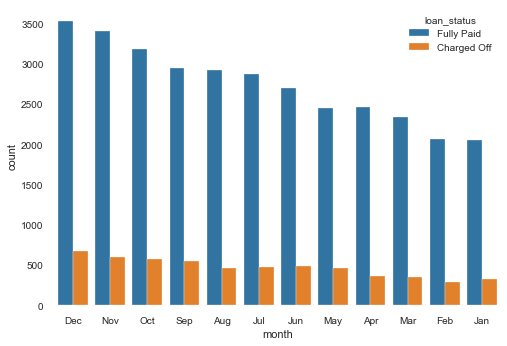

In [73]:
sns.countplot(data=ana_data_lend,x='month',hue='loan_status')

In [74]:
month_wise_count=pd.DataFrame(ana_data_lend.groupby(['month','loan_status'])['member_id'].count())

In [75]:
month_wise_count=month_wise_count.reset_index()

In [76]:
month_wise_count['total_month']=month_wise_count['month'].map(ana_data_lend.groupby(['month'])['member_id'].count().to_dict())

In [77]:
month_wise_count['percentage']=month_wise_count['member_id']/month_wise_count['total_month']

<AxesSubplot:xlabel='month', ylabel='percentage'>

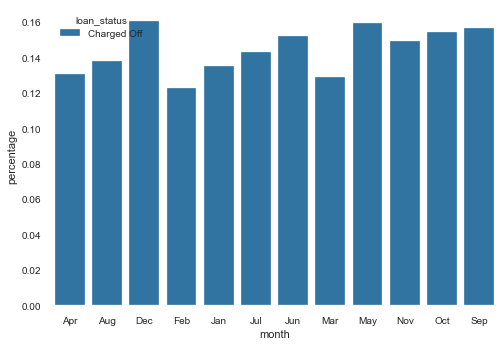

In [78]:
sns.barplot(data=month_wise_count[month_wise_count['loan_status']=='Charged Off'],x='month',y='percentage',hue='loan_status')

<AxesSubplot:xlabel='emp_length_num', ylabel='funded_amnt'>

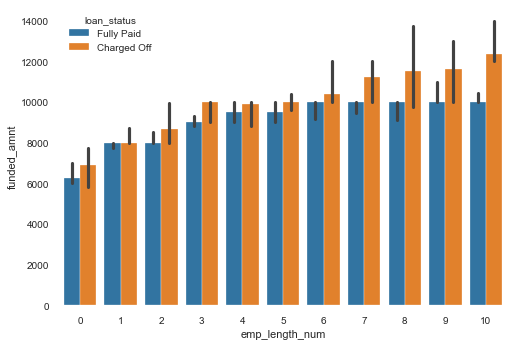

In [79]:
sns.barplot(data=ana_data_lend,x='emp_length_num',y='funded_amnt',hue='loan_status',estimator=np.median )

<AxesSubplot:xlabel='total_acc', ylabel='funded_amnt'>

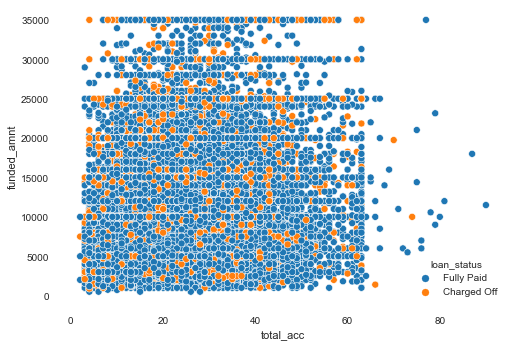

In [80]:
sns.scatterplot(data=ana_data_lend,x='total_acc',y='funded_amnt',hue='loan_status' )

<AxesSubplot:xlabel='total_acc', ylabel='Count'>

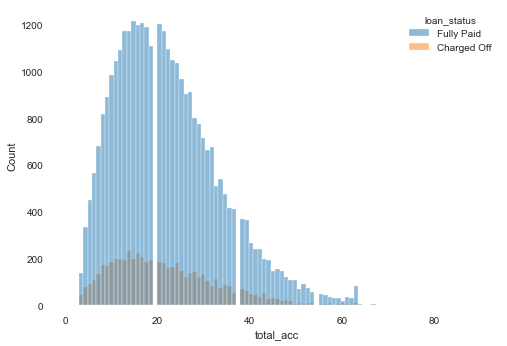

In [81]:
sns.histplot(data=ana_data_lend,x='total_acc',hue='loan_status')

<AxesSubplot:ylabel='total_acc'>

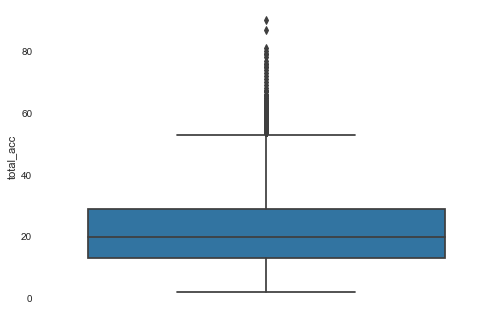

In [82]:
sns.boxplot(data=ana_data_lend,y='total_acc',hue='loan_status')

<AxesSubplot:xlabel='total_acc', ylabel='Density'>

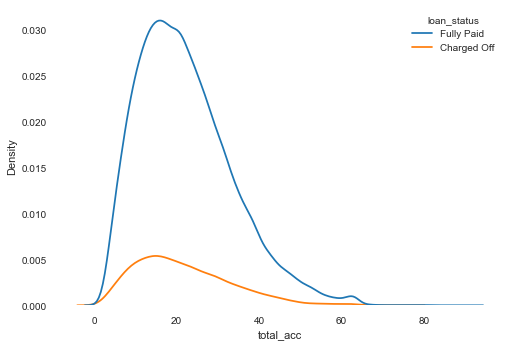

In [83]:
sns.kdeplot(data=ana_data_lend,x='total_acc',hue='loan_status')

<AxesSubplot:xlabel='installment', ylabel='funded_amnt'>

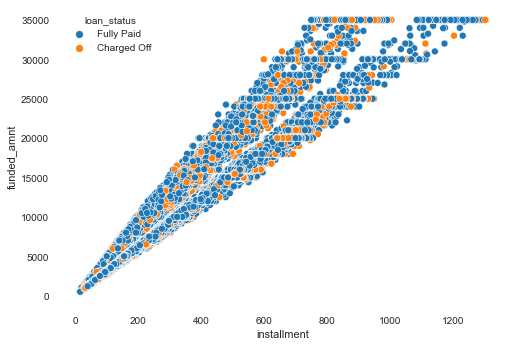

In [84]:
sns.scatterplot(data=ana_data_lend,x=ana_data_lend['installment'],y='funded_amnt',hue='loan_status')

In [85]:
ana_data_lend['high_low_install']='Low'
ana_data_lend.loc[ana_data_lend['installment']>np.median(ana_data_lend['installment']),['high_low_install']]='High'

<AxesSubplot:xlabel='high_low_install', ylabel='count'>

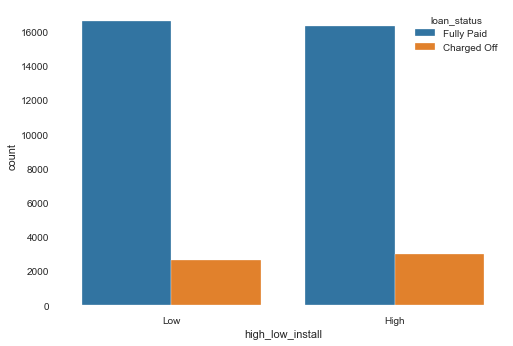

In [86]:
sns.countplot(data=ana_data_lend,x='high_low_install',hue='loan_status')

<AxesSubplot:xlabel='funded_amnt', ylabel='high_low_install'>

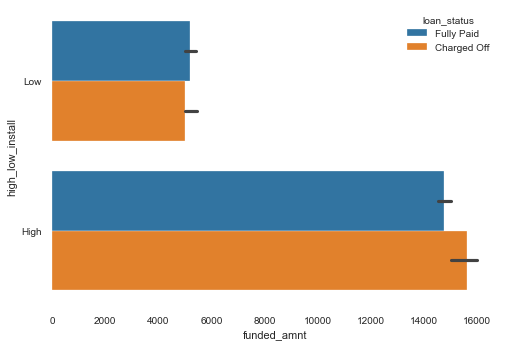

In [87]:
sns.barplot(data=ana_data_lend,y='high_low_install',x='funded_amnt',hue='loan_status',estimator=np.median)

<AxesSubplot:xlabel='delinq_2yrs', ylabel='count'>

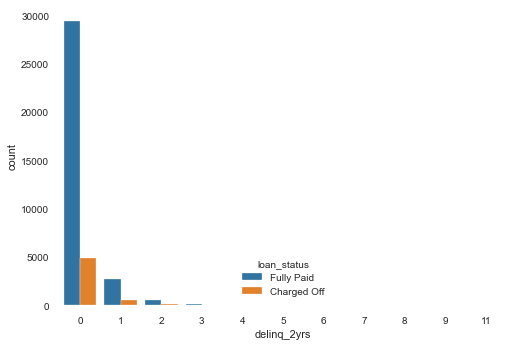

In [88]:
sns.countplot(x=ana_data_lend['delinq_2yrs'],hue=ana_data_lend['loan_status'])

In [89]:
delinq_acct=pd.DataFrame(ana_data_lend.groupby(['delinq_2yrs','loan_status'])['member_id'].count())
delinq_acct=delinq_acct.reset_index()
delinq_acct['total']=delinq_acct['delinq_2yrs'].map(ana_data_lend.groupby(['delinq_2yrs'])['member_id'].count().to_dict())

In [90]:
delinq_acct['percent']=delinq_acct['member_id']/delinq_acct['total']

<AxesSubplot:xlabel='delinq_2yrs', ylabel='percent'>

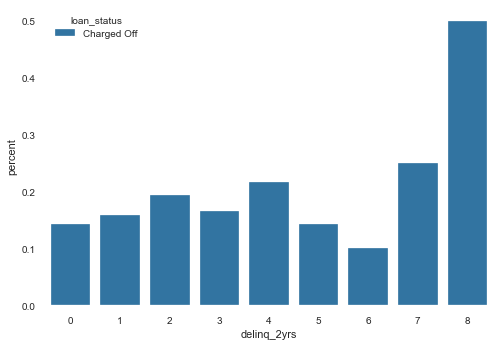

In [91]:
sns.barplot(data=delinq_acct[delinq_acct['loan_status']=='Charged Off'],x='delinq_2yrs',y='percent',hue='loan_status')

<AxesSubplot:xlabel='pub_rec', ylabel='count'>

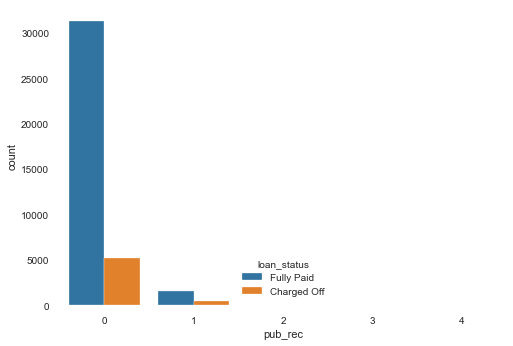

In [92]:
sns.countplot(x=ana_data_lend['pub_rec'],hue=ana_data_lend['loan_status'])

<AxesSubplot:xlabel='pub_rec', ylabel='percent'>

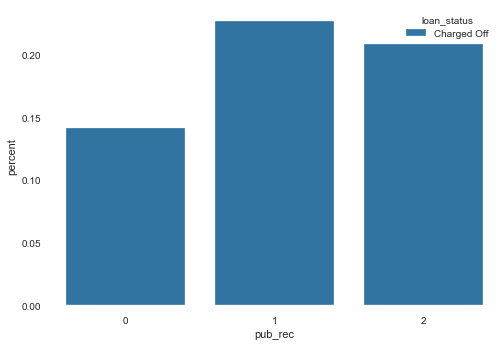

In [93]:
pub_rec=pd.DataFrame(ana_data_lend.groupby(['pub_rec','loan_status'])['member_id'].count())
pub_rec=pub_rec.reset_index()
pub_rec['total']=pub_rec['pub_rec'].map(ana_data_lend.groupby(['pub_rec'])['member_id'].count().to_dict())
pub_rec['percent']=pub_rec['member_id']/pub_rec['total']
sns.barplot(data=pub_rec[pub_rec['loan_status']=='Charged Off'],x='pub_rec',y='percent',hue='loan_status')

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='percent', ylabel='Density'>

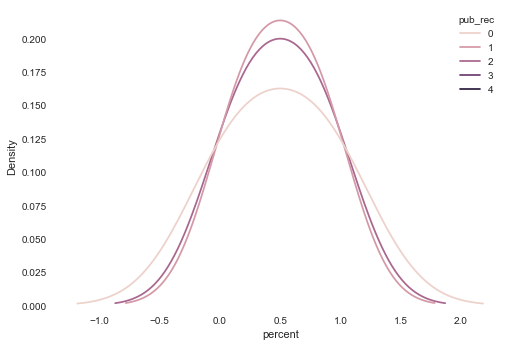

In [155]:
sns.kdeplot(data=pub_rec,x='percent',hue='pub_rec')

<AxesSubplot:xlabel='pub_rec', ylabel='percent'>

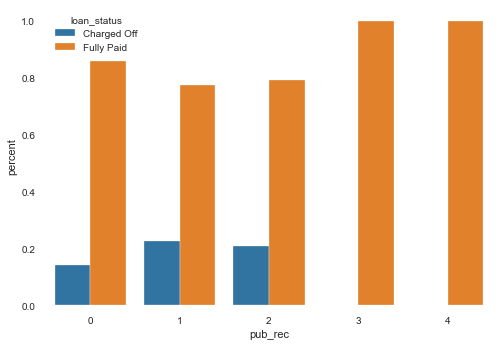

In [94]:
sns.barplot(data=pub_rec,x='pub_rec',y='percent',hue='loan_status')

<AxesSubplot:xlabel='total_pymnt_inv', ylabel='funded_amnt'>

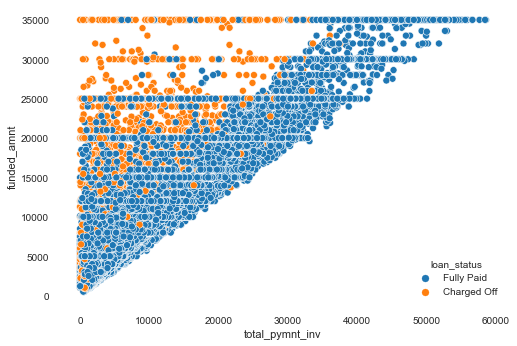

In [95]:
sns.scatterplot(data=ana_data_lend,x=ana_data_lend['total_pymnt_inv'],y='funded_amnt',hue='loan_status')

<AxesSubplot:xlabel='funded_amnt', ylabel='annual_inc'>

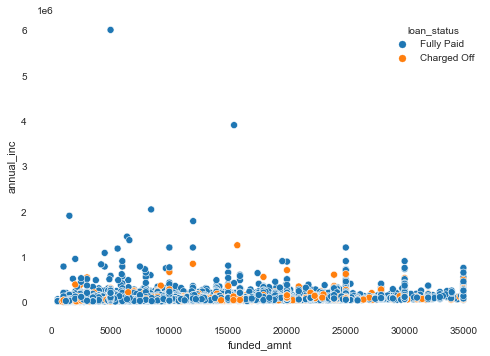

In [96]:
sns.scatterplot(data=ana_data_lend,y=ana_data_lend['annual_inc'],x='funded_amnt',hue='loan_status')

In [156]:
ana_data_lend['high_low_annual_inc']='Low'
ana_data_lend.loc[
    ((ana_data_lend['annual_inc']>np.quantile(ana_data_lend['annual_inc'],q=.30))&(ana_data_lend['annual_inc']<=np.quantile(ana_data_lend['annual_inc'],q=.80))),['high_low_annual_inc']]='Medium'
ana_data_lend.loc[(ana_data_lend['annual_inc']>np.quantile(ana_data_lend['annual_inc'],q=.80)),['high_low_annual_inc']]='High'

<AxesSubplot:xlabel='high_low_annual_inc', ylabel='count'>

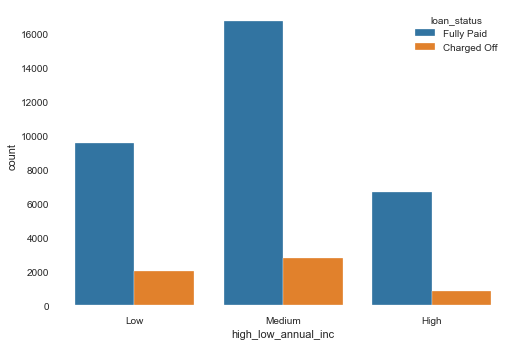

In [157]:
sns.countplot(data=ana_data_lend,x='high_low_annual_inc',hue='loan_status')

<AxesSubplot:xlabel='high_low_annual_inc', ylabel='funded_amnt'>

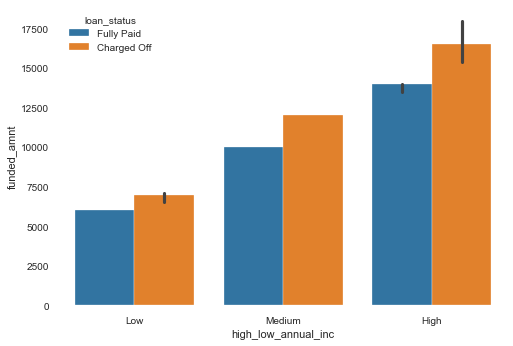

In [158]:
sns.barplot(data=ana_data_lend,x='high_low_annual_inc',y='funded_amnt',hue='loan_status',estimator=np.median)

<AxesSubplot:xlabel='grade', ylabel='funded_amnt'>

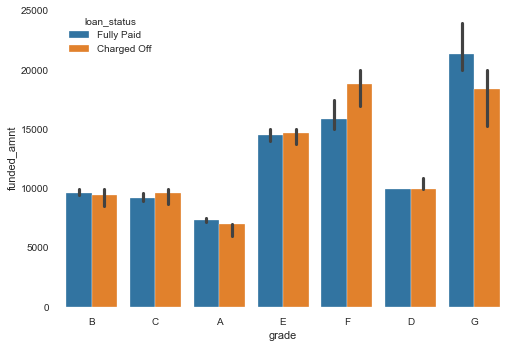

In [105]:
sns.barplot(data=ana_data_lend,x='grade',y='funded_amnt',hue='loan_status',estimator=np.median)

In [107]:
grp_order = ana_data_lend.groupby('sub_grade').funded_amnt.agg('median').sort_values().index

<AxesSubplot:xlabel='sub_grade', ylabel='funded_amnt'>

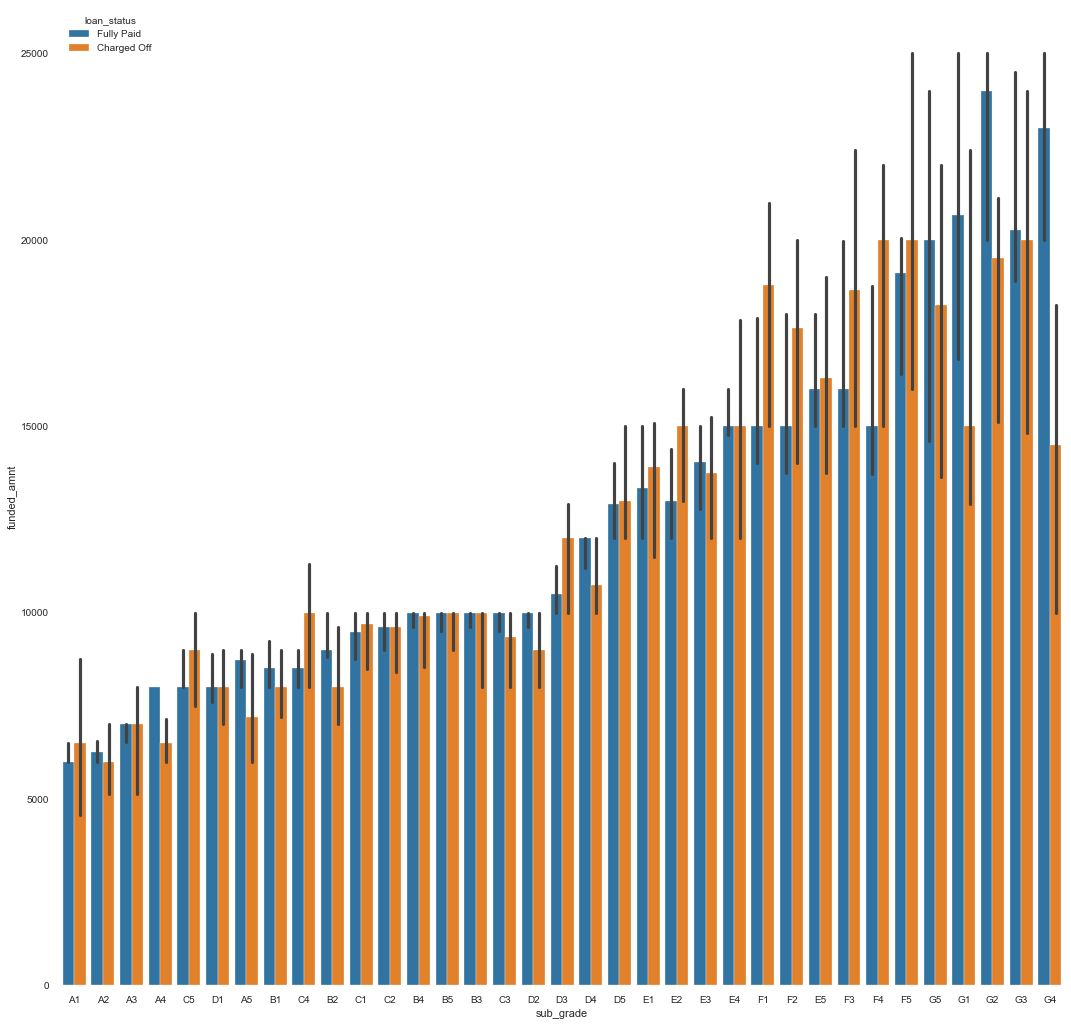

In [108]:
pyplot.subplots(figsize=(18,18))

sns.barplot(data=ana_data_lend,x='sub_grade',y='funded_amnt',hue='loan_status',estimator=np.median,order=grp_order)

<AxesSubplot:xlabel='addr_state', ylabel='funded_amnt'>

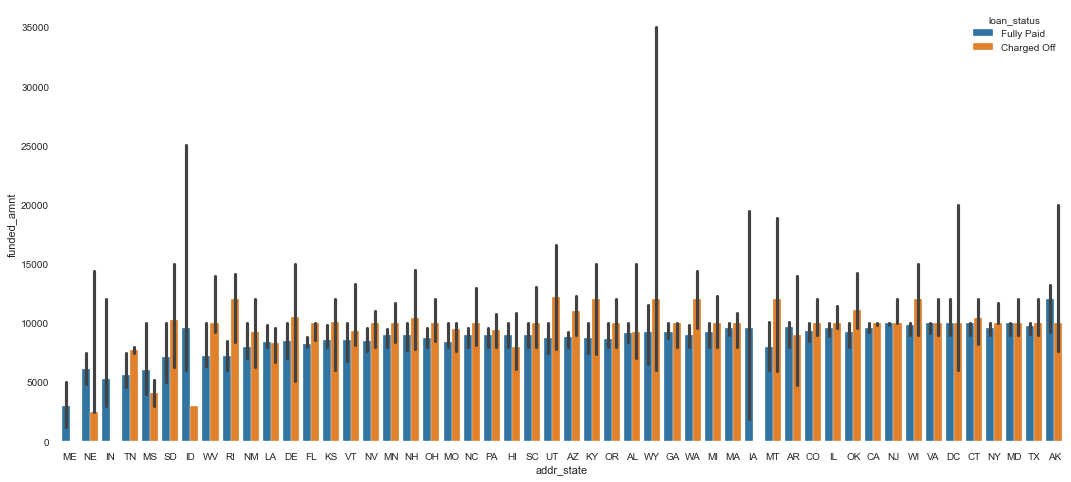

In [112]:
pyplot.subplots(figsize=(18,8))
grp_order = ana_data_lend.groupby('addr_state').funded_amnt.agg('median').sort_values().index
sns.barplot(data=ana_data_lend,x='addr_state',y='funded_amnt',hue='loan_status',estimator=np.median,order=grp_order)

<AxesSubplot:xlabel='addr_state', ylabel='percent'>

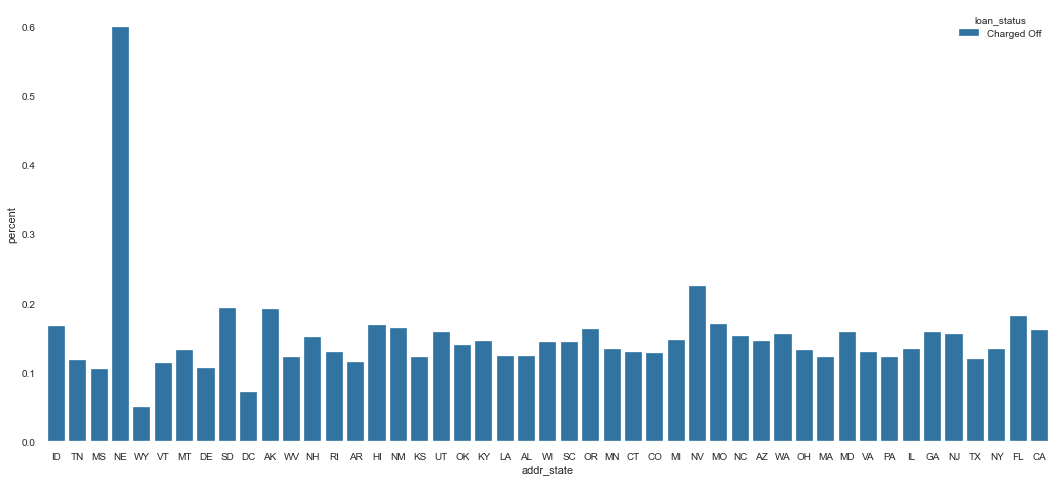

In [117]:
addr_state=pd.DataFrame(ana_data_lend.groupby(['addr_state','loan_status'])['member_id'].count())
addr_state=addr_state.reset_index()
addr_state['total']=addr_state['addr_state'].map(ana_data_lend.groupby(['addr_state'])['member_id'].count().to_dict())
addr_state['percent']=addr_state['member_id']/addr_state['total']
pyplot.subplots(figsize=(18,8))
grp_order=addr_state[addr_state['loan_status']=='Charged Off'].groupby(['addr_state']).member_id.sum().sort_values().index
sns.barplot(data=addr_state[addr_state['loan_status']=='Charged Off'],x='addr_state',y='percent',hue='loan_status',order=grp_order)

<AxesSubplot:xlabel='term', ylabel='funded_amnt'>

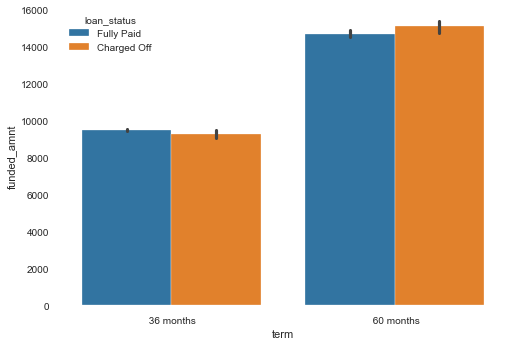

In [121]:
sns.barplot(data=ana_data_lend,x='term',y='funded_amnt',hue='loan_status')

<AxesSubplot:xlabel='int_rate', ylabel='funded_amnt'>

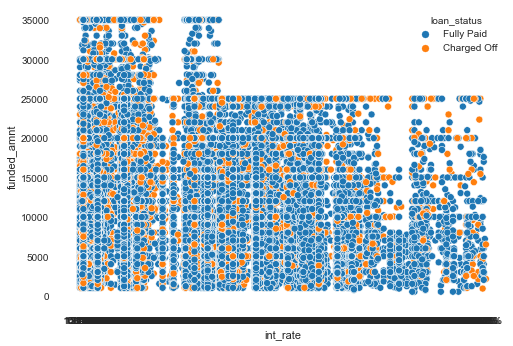

In [126]:
sns.scatterplot(data=ana_data_lend,x='int_rate',y='funded_amnt',hue='loan_status')


In [159]:
ana_data_lend['intrest_rate']=ana_data_lend['int_rate'].str[:-1].astype('float')/100.0
ana_data_lend['high_low_int_rate']='Low'
ana_data_lend.loc[
    ((ana_data_lend['intrest_rate']>np.quantile(ana_data_lend['intrest_rate'],q=.30))&(ana_data_lend['intrest_rate']<=np.quantile(ana_data_lend['intrest_rate'],q=.80))),['high_low_int_rate']]='Medium'
ana_data_lend.loc[(ana_data_lend['intrest_rate']>np.quantile(ana_data_lend['intrest_rate'],q=.85)),['high_low_int_rate']]='High'

<AxesSubplot:xlabel='high_low_int_rate', ylabel='count'>

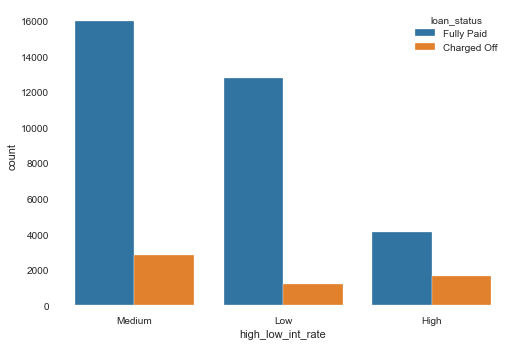

In [160]:
sns.countplot(data=ana_data_lend,x='high_low_int_rate',hue='loan_status')

In [134]:
np.quantile(ana_data_lend['intrest_rate'],q=.30)

0.0999

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

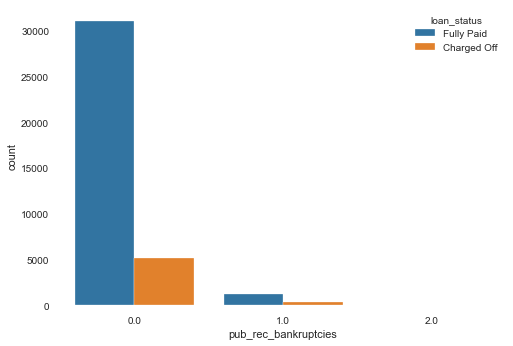

In [136]:

sns.countplot(data=ana_data_lend,x='pub_rec_bankruptcies',hue='loan_status')

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='percent'>

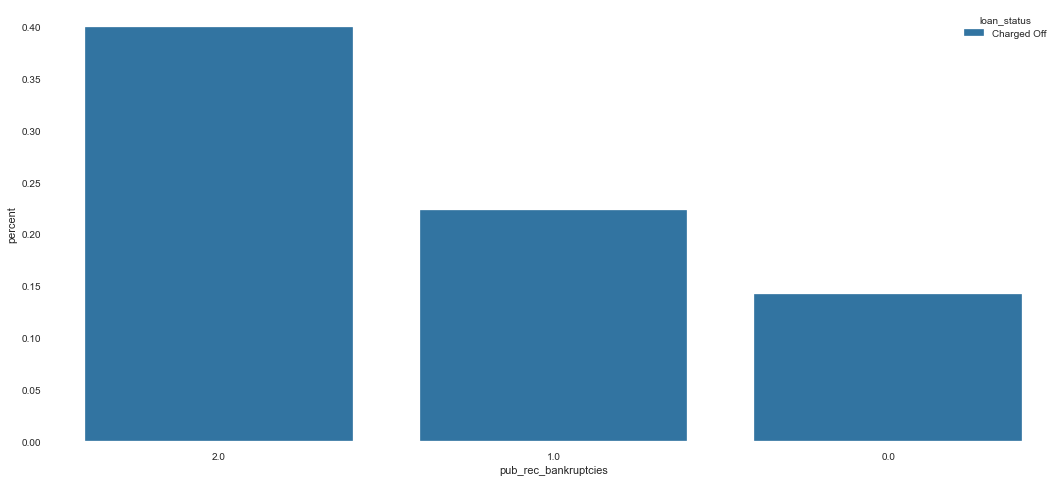

In [137]:
pub_rec_bankruptcies=pd.DataFrame(ana_data_lend.groupby(['pub_rec_bankruptcies','loan_status'])['member_id'].count())
pub_rec_bankruptcies=pub_rec_bankruptcies.reset_index()
pub_rec_bankruptcies['total']=pub_rec_bankruptcies['pub_rec_bankruptcies'].map(ana_data_lend.groupby(['pub_rec_bankruptcies'])['member_id'].count().to_dict())
pub_rec_bankruptcies['percent']=pub_rec_bankruptcies['member_id']/pub_rec_bankruptcies['total']
pyplot.subplots(figsize=(18,8))
grp_order=pub_rec_bankruptcies[pub_rec_bankruptcies['loan_status']=='Charged Off'].groupby(['pub_rec_bankruptcies']).member_id.sum().sort_values().index
sns.barplot(data=pub_rec_bankruptcies[pub_rec_bankruptcies['loan_status']=='Charged Off'],x='pub_rec_bankruptcies',y='percent',hue='loan_status',order=grp_order)

<AxesSubplot:xlabel='inq_last_6mths', ylabel='funded_amnt'>

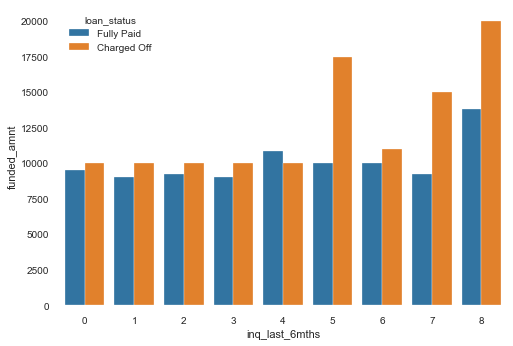

In [143]:
sns.barplot(data=ana_data_lend,x='inq_last_6mths',y='funded_amnt',hue='loan_status',ci=0,estimator=np.median)

In [162]:
# ana_data_lend['intrest_rate']=ana_data_lend['int_rate'].str[:-1].astype('float')/100.0
ana_data_lend['high_low_dti']='Low'
ana_data_lend.loc[
    ((ana_data_lend['dti']>np.quantile(ana_data_lend['dti'],q=.30))&(ana_data_lend['dti']<=np.quantile(ana_data_lend['dti'],q=.80))),['high_low_dti']]='Medium'
ana_data_lend.loc[(ana_data_lend['dti']>np.quantile(ana_data_lend['dti'],q=.80)),['high_low_dti']]='High'

<AxesSubplot:xlabel='high_low_dti', ylabel='count'>

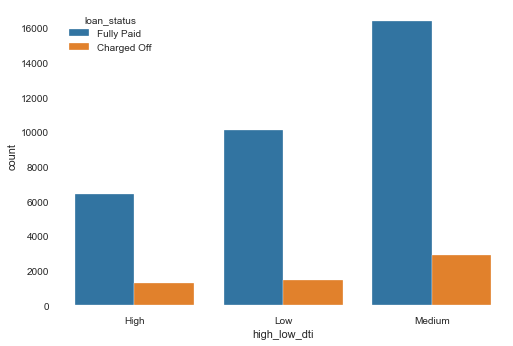

In [163]:
sns.countplot(data=ana_data_lend,x='high_low_dti',hue='loan_status')

<AxesSubplot:xlabel='high_low_dti', ylabel='percent'>

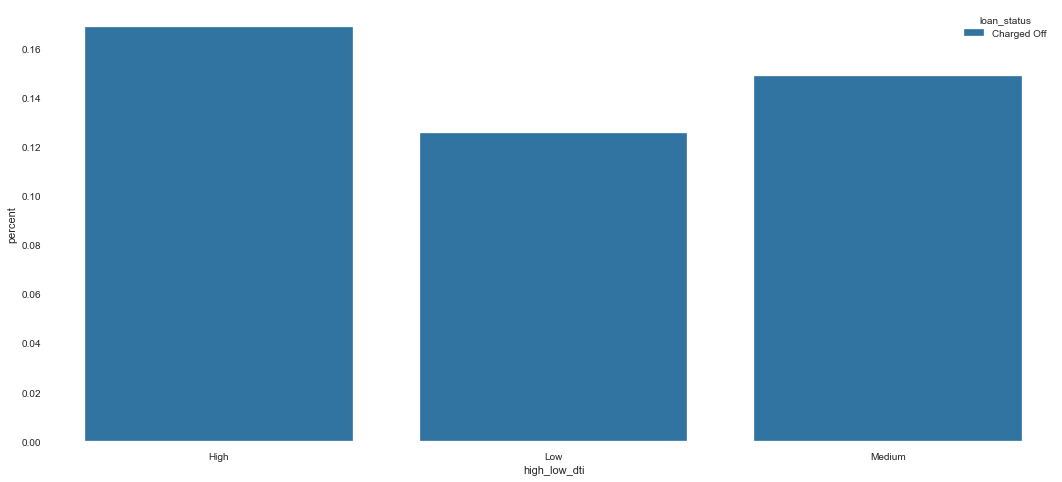

In [164]:
high_low_dti=pd.DataFrame(ana_data_lend.groupby(['high_low_dti','loan_status'])['member_id'].count())
high_low_dti=high_low_dti.reset_index()
high_low_dti['total']=high_low_dti['high_low_dti'].map(ana_data_lend.groupby(['high_low_dti'])['member_id'].count().to_dict())
high_low_dti['percent']=high_low_dti['member_id']/high_low_dti['total']
pyplot.subplots(figsize=(18,8))
grp_order=high_low_dti[high_low_dti['loan_status']=='Charged Off'].groupby(['high_low_dti']).member_id.sum().sort_values().index
sns.barplot(data=high_low_dti[high_low_dti['loan_status']=='Charged Off'],x='high_low_dti',y='percent',hue='loan_status',order=grp_order)